# ASSIGNMENT 2 - BUILDING NEURAL NETWORK AND CONVOLUTION NEURAL NETWORKS

### SRIINITHA CHINNAPATLOLA  (50478024) , SHRAVANI SOMA  ( 50477925)

## Part I: Building a Basic Neural Network

In [1]:
# Importing the required libraries
import os
import torch
import pandas as pd
import numpy as np
import seaborn as sns
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from sklearn.metrics import confusion_matrix
from torchvision import datasets, transforms
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Step 1: Loading the Dataset

In [2]:
# Step-1 Loading the dataset
df = pd.read_csv("dataset.csv")
df

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...
761,9,89,62,0,0,22.5,e,0
762,10,101,76,48,180,d,0.171,0
763,2,122,70,27,b,36.8,0.34,0
764,c,121,72,23,112,26.2,0.245,0


## VISUALIZATIONS

### 1. To determine the number of categorical values in a feature.

(array([ 50.,   0., 134.,   0.,  38.,   0.,   0., 111.,   0.,  56.,   0.,
         75.,   0.,   0.,  24.,   0., 102.,   0.,  68.,   0.,   0.,  45.,
          0.,  28.,   0.,  11.,   0.,   0.,  10.,   0.,   1.,   0.,   1.,
          0.,   0.,   9.,   0.,   2.,   0.,   1.]),
 array([ 0.   ,  0.425,  0.85 ,  1.275,  1.7  ,  2.125,  2.55 ,  2.975,
         3.4  ,  3.825,  4.25 ,  4.675,  5.1  ,  5.525,  5.95 ,  6.375,
         6.8  ,  7.225,  7.65 ,  8.075,  8.5  ,  8.925,  9.35 ,  9.775,
        10.2  , 10.625, 11.05 , 11.475, 11.9  , 12.325, 12.75 , 13.175,
        13.6  , 14.025, 14.45 , 14.875, 15.3  , 15.725, 16.15 , 16.575,
        17.   ]),
 <BarContainer object of 40 artists>)

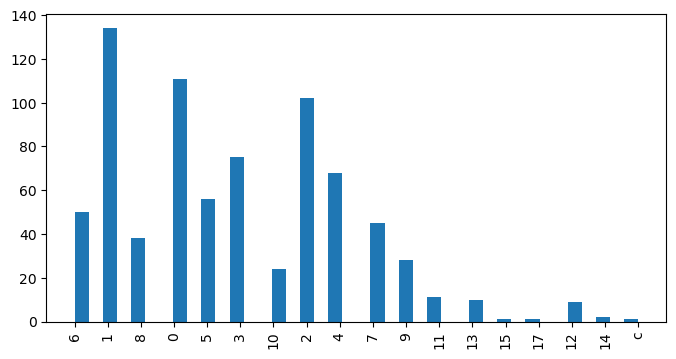

In [3]:
plt.figure(figsize = (8,4))
plt.xticks(rotation = 90)
plt.hist(df['f1'],bins = 40)

### 2. Identifying Outliers

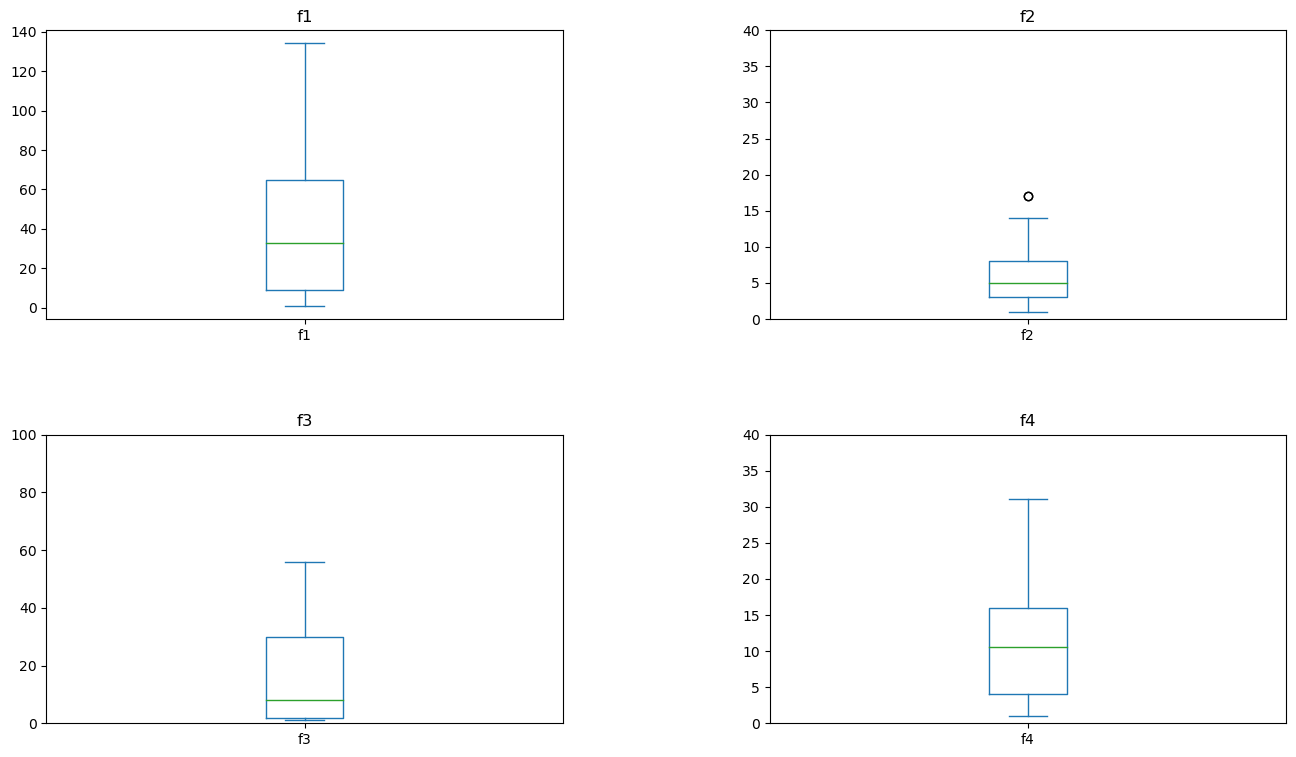

In [4]:
plt.subplot(221)

df['f1'].value_counts().plot(kind='box', title='f1',figsize=(16,9))
plt.subplot(222)
df['f2'].value_counts().plot(kind='box', title='f2')
plt.ylim(0,40)
plt.subplot(223)
df['f3'].value_counts().plot(kind='box', title='f3')
plt.ylim(0,100)
plt.subplot(224)
df['f4'].value_counts().plot(kind='box', title='f4')
plt.ylim(0,40)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.show()

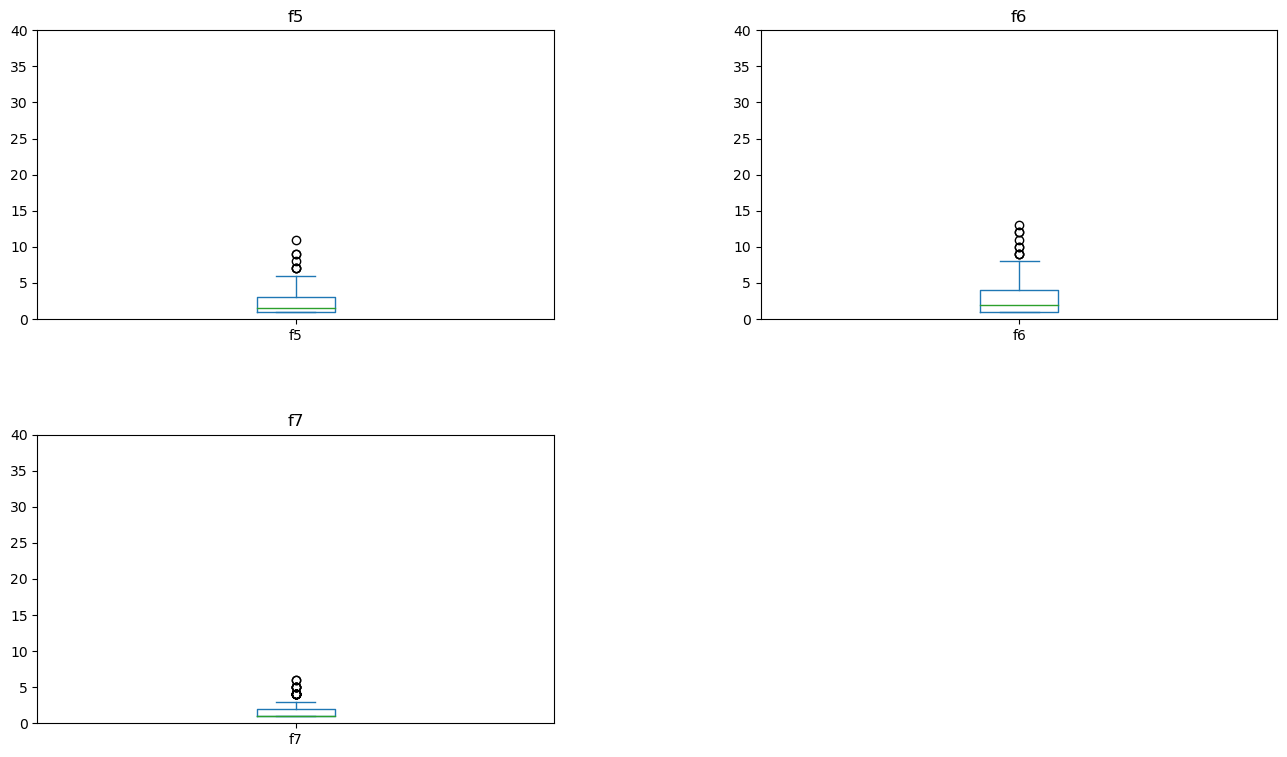

In [5]:
plt.subplot(221)

df['f5'].value_counts().plot(kind='box', title='f5',figsize=(16,9))
plt.ylim(0,40)
plt.subplot(222)
df['f6'].value_counts().plot(kind='box', title='f6')
plt.ylim(0,40)
plt.subplot(223)
df['f7'].value_counts().plot(kind='box', title='f7')
plt.ylim(0,40)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.show()

2.

### Step 2: Preprocessing the Dataset

In [6]:
# Step-2 Dropping the rows consisting of non-numeric values
df = df.apply(pd.to_numeric, errors='coerce')
df = df[pd.notna(df).all(axis=1)]

In [7]:
df

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1
...,...,...,...,...,...,...,...,...
755,1.0,128.0,88,39.0,110.0,36.5,1.057,1
756,7.0,137.0,90,41.0,0.0,32.0,0.391,0
757,0.0,123.0,72,0.0,0.0,36.3,0.258,1
758,1.0,106.0,76,0.0,0.0,37.5,0.197,0


### 3. HEATMAP 

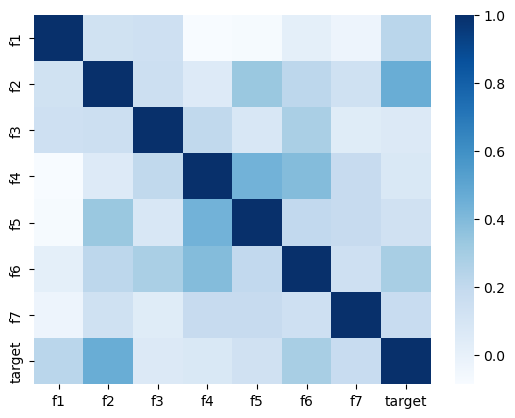

In [8]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues")
plt.show()

In [9]:
# MAIN STATISTICS OF THE DATA AFTER DROPPING THE ROWS CONTAINING NON-NUMERIC VALUES
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


In [10]:
# We have to scale only the features - hence we divide the data into feature set and target
X, y = df.drop('target', axis=1), df['target']

In [11]:
print(X.shape)
print(y.shape)

(760, 7)
(760,)


In [12]:
# Scaling numerical values to have zero mean and unit variance
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [13]:
df_scaled

,f1,f2,f3,f4,f5,f6,f7
0,0.644092,0.844637,0.148213,0.908737,-0.694636,0.202839,0.463021
1,-0.842876,-1.123976,-0.160536,0.532503,-0.694636,-0.683852,-0.368158
2,1.238879,1.938311,-0.263452,-1.285961,-0.694636,-1.101863,0.598540
3,-0.842876,-0.998985,-0.160536,0.156269,0.119179,-0.493847,-0.922278
4,-1.140270,0.500911,-1.498446,0.908737,0.759842,1.406204,5.465156
...,...,...,...,...,...,...,...
755,-0.842876,0.219680,0.971542,1.159559,0.257700,0.570182,1.757975
756,0.941485,0.500911,1.074458,1.284971,-0.694636,0.000167,-0.247698
757,-1.140270,0.063441,0.148213,-1.285961,-0.694636,0.544848,-0.648230
758,-0.842876,-0.467772,0.354045,-1.285961,-0.694636,0.696852,-0.831932


In [14]:
# Spilitting the data into training and validation sets and converting them to tensors
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test  = torch.tensor(X_train.values), torch.tensor(X_test.values), torch.tensor(y_train.values), torch.tensor(y_test.values)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([608, 7])
torch.Size([608])
torch.Size([152, 7])
torch.Size([152])


In [16]:
print("Shape of X_train,y_train",np.shape(X_train), np.shape(X_test))
print("Shape of X_train,y_train",np.shape(y_train), np.shape(y_test))

Shape of X_train,y_train torch.Size([608, 7]) torch.Size([152, 7])
Shape of X_train,y_train torch.Size([608]) torch.Size([152])


In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [18]:
train_dataloader, test_dataloader = DataLoader(TensorDataset(X_train,y_train), batch_size=64), DataLoader(TensorDataset(X_test,y_test), batch_size=64)

In [19]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)
print("MODEL SUMMARY:")
print(model)

MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)


In [20]:
model.to(device)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

training_loss = []
testing_loss = []
training_accuracy = []
testing_accuracy = []
def train_loop(train_dataloader, model, loss_fn, optimizer):
    size = len(train_dataloader.dataset)
    num_correct = 0
    for batch, (df_scaled, y) in enumerate(train_dataloader):
        df_scaled = df_scaled.to(device=device, dtype=torch.float32)
        pred = model(df_scaled)
        loss = loss_fn(pred, y)
        training_loss.append(loss.item())
        num_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    num_correct /= size
    train_a = 100*num_correct
    training_accuracy.append(train_a)
       
def test_loop(test_dataloader, model, loss_fn):
    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss, test_correct = 0, 0
    true_values = []
    predicted_values = []
    with torch.no_grad():
        for df_scaled, y in test_dataloader:
            df_scaled = df_scaled.to(device=device, dtype=torch.float32)
            pred = model(df_scaled)
            test_loss += loss_fn(pred, y).item()
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            #true_batch = y.tolist()
            true_results = []
            for item in y:
                true_results.append(item.item())
            predicted_results = pred.argmax(1).tolist()
            true_values += true_results
            predicted_values += predicted_results

    test_loss /= num_batches
    testing_loss.append(test_loss)
    test_correct /= size
    test_a = 100*test_correct
    testing_accuracy.append(test_a)
    print(f"Test Error: \n Accuracy: {test_a:>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return true_values, predicted_values

In [22]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    true_values, predicted_values = test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.703259  [  760/  608]
Test Error: 
 Accuracy: 53.3%, Avg loss: 0.691522 

Epoch 2
-------------------------------
loss: 0.692477  [  760/  608]
Test Error: 
 Accuracy: 70.4%, Avg loss: 0.672342 

Epoch 3
-------------------------------
loss: 0.675626  [  760/  608]
Test Error: 
 Accuracy: 65.1%, Avg loss: 0.654651 

Epoch 4
-------------------------------
loss: 0.660029  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.639994 

Epoch 5
-------------------------------
loss: 0.647036  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.627819 

Epoch 6
-------------------------------
loss: 0.636126  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.617391 

Epoch 7
-------------------------------
loss: 0.626583  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.608071 

Epoch 8
-------------------------------
loss: 0.617828  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.599427 

Epoch 9
----------------

Test Error: 
 Accuracy: 75.7%, Avg loss: 0.472061 

Epoch 72
-------------------------------
loss: 0.467936  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.472139 

Epoch 73
-------------------------------
loss: 0.467548  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.472211 

Epoch 74
-------------------------------
loss: 0.467158  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.472279 

Epoch 75
-------------------------------
loss: 0.466766  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.472359 

Epoch 76
-------------------------------
loss: 0.466375  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.472429 

Epoch 77
-------------------------------
loss: 0.465983  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.472501 

Epoch 78
-------------------------------
loss: 0.465584  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.472564 

Epoch 79
-------------------------------
loss: 0.465179  [  760/  608]
Test Error: 
 Ac

In [23]:
torch.save(model.state_dict(), 'ssoma_sriinith_assignment2_part1.pth')

### RESULT VISUALIZATIONS

### Confusion Matrix

Confusion matrix: [[83 17]
 [20 32]]


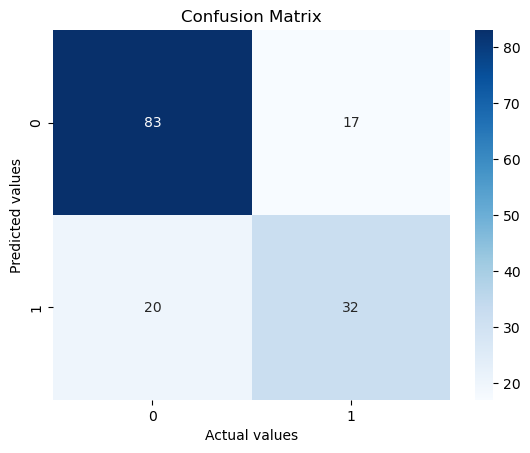

[[83 17]
 [20 32]]


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_values, predicted_values)
print("Confusion matrix:",cm)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()
print(cm)

### Training and Testing Loss

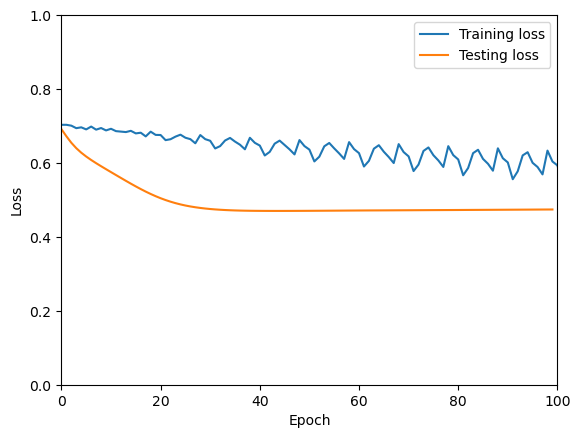

In [25]:
plt.plot(training_loss, label='Training loss')
plt.plot(testing_loss, label='Testing loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0,100)
plt.show()

## Training and Testing Accuracy

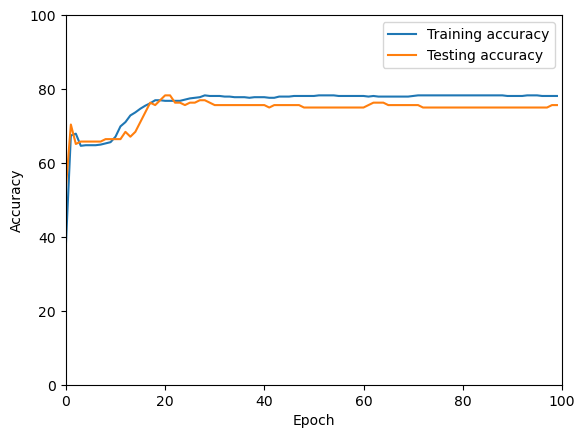

In [26]:
#print(training_accuracy)
plt.plot(training_accuracy, label='Training accuracy')
plt.plot(testing_accuracy, label='Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

## Part 2

### Hyperparameter1 - Dropout

In [27]:
# defininf for a probability list

prob_list = [0.1, 0.2, 0.3]

In [28]:
# writing a function for epochs

def epochloop(epochs):
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loop(train_dataloader, model, loss_fn, optimizer)
        test_loop(test_dataloader, model, loss_fn)
    print("Done!")

In [29]:
for i in prob_list:
    class NeuralNetwork(nn.Module):
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(7, 512),
                nn.ReLU(),
                nn.Dropout(p=i),
                nn.Linear(512,512),
                nn.ReLU(),
                nn.Dropout(p=i),
                nn.Linear(512,512),
                nn.ReLU(),
                nn.Dropout(p=i),
                nn.Linear(512, 2),
            )

        def forward(self, x):
            x = self.flatten(x)
            logits = self.linear_relu_stack(x)
            return logits
    print("MODEL SUMMARY:")
    print(model)
    
    
    epochloop(100)
    print("\n")

MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.456301  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.474223 

Epoch 2
-------------------------------
loss: 0.455897  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.474305 

Epoch 3
-------------------------------
loss: 0.455495  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.474383 

Epoch 4
-------------------------------
loss: 0.455101  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.474458 

Epoch 5
-------------------------------
loss: 0.454700  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Av

Test Error: 
 Accuracy: 75.0%, Avg loss: 0.479903 

Epoch 65
-------------------------------
loss: 0.431429  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.479993 

Epoch 66
-------------------------------
loss: 0.431043  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.480098 

Epoch 67
-------------------------------
loss: 0.430652  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.480193 

Epoch 68
-------------------------------
loss: 0.430265  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.480294 

Epoch 69
-------------------------------
loss: 0.429888  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.480397 

Epoch 70
-------------------------------
loss: 0.429506  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.480489 

Epoch 71
-------------------------------
loss: 0.429118  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.480574 

Epoch 72
-------------------------------
loss: 0.428722  [  760/  608]
Test Error: 
 Ac

Test Error: 
 Accuracy: 73.7%, Avg loss: 0.487222 

Epoch 31
-------------------------------
loss: 0.405334  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.487335 

Epoch 32
-------------------------------
loss: 0.404908  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.487503 

Epoch 33
-------------------------------
loss: 0.404470  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.487605 

Epoch 34
-------------------------------
loss: 0.404055  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.487746 

Epoch 35
-------------------------------
loss: 0.403652  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.487914 

Epoch 36
-------------------------------
loss: 0.403254  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.488028 

Epoch 37
-------------------------------
loss: 0.402839  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.488159 

Epoch 38
-------------------------------
loss: 0.402442  [  760/  608]
Test Error: 
 Ac

Test Error: 
 Accuracy: 72.4%, Avg loss: 0.497683 

Epoch 98
-------------------------------
loss: 0.377002  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.497838 

Epoch 99
-------------------------------
loss: 0.376598  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.498022 

Epoch 100
-------------------------------
loss: 0.376147  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.498179 

Done!


MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.375715  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.498396 

Epoch 2
-------------------------------

Test Error: 
 Accuracy: 72.4%, Avg loss: 0.512503 

Epoch 62
-------------------------------
loss: 0.346533  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.512797 

Epoch 63
-------------------------------
loss: 0.345955  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.513081 

Epoch 64
-------------------------------
loss: 0.345494  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.513437 

Epoch 65
-------------------------------
loss: 0.345027  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.513741 

Epoch 66
-------------------------------
loss: 0.344465  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.513986 

Epoch 67
-------------------------------
loss: 0.343929  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.514352 

Epoch 68
-------------------------------
loss: 0.343485  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.514636 

Epoch 69
-------------------------------
loss: 0.342868  [  760/  608]
Test Error: 
 Ac

(Scroll down to look at three different accuracies generated for three different probabilities provided!!)

### Hyperparameter2 - Activation Functions

### (1) Tanh

In [30]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_tanh_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.Tanh(),
            nn.Linear(512,512),
            nn.Tanh(),
            nn.Linear(512,512),
            nn.Tanh(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_tanh_stack(x)
        return logits

model = NeuralNetwork().to(device)
print("MODEL SUMMARY:")
print(model)

model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

epochloop(100)

MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_tanh_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): Tanh()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Tanh()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): Tanh()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.692962  [  760/  608]
Test Error: 
 Accuracy: 73.0%, Avg loss: 0.651510 

Epoch 2
-------------------------------
loss: 0.649954  [  760/  608]
Test Error: 
 Accuracy: 73.0%, Avg loss: 0.588247 

Epoch 3
-------------------------------
loss: 0.589604  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.540986 

Epoch 4
-------------------------------
loss: 0.545702  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.510521 

Epoch 5
-------------------------------
loss: 0.518677  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Av

Test Error: 
 Accuracy: 74.3%, Avg loss: 0.458328 

Epoch 70
-------------------------------
loss: 0.492576  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.458325 

Epoch 71
-------------------------------
loss: 0.492472  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.458323 

Epoch 72
-------------------------------
loss: 0.492368  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.458321 

Epoch 73
-------------------------------
loss: 0.492264  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.458319 

Epoch 74
-------------------------------
loss: 0.492159  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.458316 

Epoch 75
-------------------------------
loss: 0.492054  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.458315 

Epoch 76
-------------------------------
loss: 0.491949  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.458313 

Epoch 77
-------------------------------
loss: 0.491843  [  760/  608]
Test Error: 
 Ac

### (2) LeakyReLU

In [31]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_leakyrelu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.LeakyReLU(),
            nn.Linear(512,512),
            nn.LeakyReLU(),
            nn.Linear(512,512),
            nn.LeakyReLU(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_leakyrelu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)
print(" MODEL SUMMARY:")
print(model)

model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

epochloop(100)

 MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_leakyrelu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.694423  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.681184 

Epoch 2
-------------------------------
loss: 0.686005  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.666444 

Epoch 3
-------------------------------
loss: 0.672403  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.652188 

Epoch 4
-------------------------------
loss: 0.659192  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.639698 

Epoch 5
-----------------

Test Error: 
 Accuracy: 75.7%, Avg loss: 0.462456 

Epoch 68
-------------------------------
loss: 0.463304  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.462564 

Epoch 69
-------------------------------
loss: 0.462825  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.462665 

Epoch 70
-------------------------------
loss: 0.462332  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.462749 

Epoch 71
-------------------------------
loss: 0.461823  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.462843 

Epoch 72
-------------------------------
loss: 0.461316  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.462941 

Epoch 73
-------------------------------
loss: 0.460814  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.463039 

Epoch 74
-------------------------------
loss: 0.460315  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.463141 

Epoch 75
-------------------------------
loss: 0.459813  [  760/  608]
Test Error: 
 Ac

### (3) PReLU

In [32]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_prelu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.PReLU(),
            nn.Linear(512,512),
            nn.PReLU(),
            nn.Linear(512,512),
            nn.PReLU(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_prelu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)
print(" MODEL SUMMARY:")
print(model)

model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

epochloop(100)

 MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_prelu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.698181  [  760/  608]
Test Error: 
 Accuracy: 61.8%, Avg loss: 0.682870 

Epoch 2
-------------------------------
loss: 0.684740  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.659500 

Epoch 3
-------------------------------
loss: 0.663035  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.637013 

Epoch 4
-------------------------------
loss: 0.642049  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.617451 

Epoch 5
-------------------------------
loss: 0.62

Test Error: 
 Accuracy: 73.7%, Avg loss: 0.469093 

Epoch 65
-------------------------------
loss: 0.478904  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.469138 

Epoch 66
-------------------------------
loss: 0.478549  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.469184 

Epoch 67
-------------------------------
loss: 0.478193  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.469232 

Epoch 68
-------------------------------
loss: 0.477833  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.469278 

Epoch 69
-------------------------------
loss: 0.477478  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.469317 

Epoch 70
-------------------------------
loss: 0.477118  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.469351 

Epoch 71
-------------------------------
loss: 0.476755  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.469386 

Epoch 72
-------------------------------
loss: 0.476397  [  760/  608]
Test Error: 
 Ac

### Hyperparameter 3 - Optimizers

In [33]:
# Base Code

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

### (1) Adam

In [34]:
model = NeuralNetwork().to(device)
print(" MODEL SUMMARY:")
print(model)

model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochloop(100)

 MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.706829  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.509968 

Epoch 2
-------------------------------
loss: 0.509928  [  760/  608]
Test Error: 
 Accuracy: 71.1%, Avg loss: 0.547826 

Epoch 3
-------------------------------
loss: 0.504323  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.489469 

Epoch 4
-------------------------------
loss: 0.450754  [  760/  608]
Test Error: 
 Accuracy: 76.3%, Avg loss: 0.490058 

Epoch 5
-------------------------------
loss: 0.441121  [  760/  608]
Test Error: 
 Accuracy: 73.0%, A

Test Error: 
 Accuracy: 67.8%, Avg loss: 2.844874 

Epoch 67
-------------------------------
loss: 0.001344  [  760/  608]
Test Error: 
 Accuracy: 68.4%, Avg loss: 2.883399 

Epoch 68
-------------------------------
loss: 0.001267  [  760/  608]
Test Error: 
 Accuracy: 68.4%, Avg loss: 2.916081 

Epoch 69
-------------------------------
loss: 0.001153  [  760/  608]
Test Error: 
 Accuracy: 67.8%, Avg loss: 2.947701 

Epoch 70
-------------------------------
loss: 0.001044  [  760/  608]
Test Error: 
 Accuracy: 67.8%, Avg loss: 2.980467 

Epoch 71
-------------------------------
loss: 0.000964  [  760/  608]
Test Error: 
 Accuracy: 67.8%, Avg loss: 3.010473 

Epoch 72
-------------------------------
loss: 0.000897  [  760/  608]
Test Error: 
 Accuracy: 67.8%, Avg loss: 3.040831 

Epoch 73
-------------------------------
loss: 0.000839  [  760/  608]
Test Error: 
 Accuracy: 67.8%, Avg loss: 3.070602 

Epoch 74
-------------------------------
loss: 0.000778  [  760/  608]
Test Error: 
 Ac

### (2) ASGD

In [35]:
model = NeuralNetwork().to(device)
print(" MODEL SUMMARY:")
print(model)

model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.ASGD(model.parameters(), lr=1e-3)

epochloop(100)

 MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.688469  [  760/  608]
Test Error: 
 Accuracy: 68.4%, Avg loss: 0.684782 

Epoch 2
-------------------------------
loss: 0.686155  [  760/  608]
Test Error: 
 Accuracy: 69.7%, Avg loss: 0.682332 

Epoch 3
-------------------------------
loss: 0.683912  [  760/  608]
Test Error: 
 Accuracy: 69.1%, Avg loss: 0.679952 

Epoch 4
-------------------------------
loss: 0.681731  [  760/  608]
Test Error: 
 Accuracy: 69.1%, Avg loss: 0.677639 

Epoch 5
-------------------------------
loss: 0.679611  [  760/  608]
Test Error: 
 Accuracy: 67.1%, A

Test Error: 
 Accuracy: 65.8%, Avg loss: 0.595225 

Epoch 66
-------------------------------
loss: 0.601021  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.594277 

Epoch 67
-------------------------------
loss: 0.600072  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.593334 

Epoch 68
-------------------------------
loss: 0.599127  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.592395 

Epoch 69
-------------------------------
loss: 0.598185  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.591460 

Epoch 70
-------------------------------
loss: 0.597246  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.590529 

Epoch 71
-------------------------------
loss: 0.596310  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.589604 

Epoch 72
-------------------------------
loss: 0.595377  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.588682 

Epoch 73
-------------------------------
loss: 0.594447  [  760/  608]
Test Error: 
 Ac

### (3) Rprop

In [36]:
model = NeuralNetwork().to(device)
print(" MODEL SUMMARY:")
print(model)

model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Rprop(model.parameters(), lr=1e-3)

epochloop(100)

 MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.713728  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.489341 

Epoch 2
-------------------------------
loss: 0.476813  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.497876 

Epoch 3
-------------------------------
loss: 0.460844  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.490877 

Epoch 4
-------------------------------
loss: 0.452203  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.489715 

Epoch 5
-------------------------------
loss: 0.448353  [  760/  608]
Test Error: 
 Accuracy: 73.7%, A

Test Error: 
 Accuracy: 76.3%, Avg loss: 0.546753 

Epoch 66
-------------------------------
loss: 0.374102  [  760/  608]
Test Error: 
 Accuracy: 76.3%, Avg loss: 0.549695 

Epoch 67
-------------------------------
loss: 0.375885  [  760/  608]
Test Error: 
 Accuracy: 76.3%, Avg loss: 0.553232 

Epoch 68
-------------------------------
loss: 0.379705  [  760/  608]
Test Error: 
 Accuracy: 76.3%, Avg loss: 0.628881 

Epoch 69
-------------------------------
loss: 0.376747  [  760/  608]
Test Error: 
 Accuracy: 76.3%, Avg loss: 0.578182 

Epoch 70
-------------------------------
loss: 0.374554  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.574666 

Epoch 71
-------------------------------
loss: 0.372527  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.566960 

Epoch 72
-------------------------------
loss: 0.369985  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.562679 

Epoch 73
-------------------------------
loss: 0.366840  [  760/  608]
Test Error: 
 Ac

### Hyperparameter 4  - Initializer

### XAVIER INITIALIZATION

In [37]:
# You initialize the weights and bias for the Linear() layer
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                #torch.nn.init.zeros_(m.bias)
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NeuralNetwork().to(device)
print(" MODEL SUMMARY:")
print(model)

epochloop(100)

 MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 2
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 3
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 4
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 5
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, A

Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 69
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 70
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 71
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 72
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 73
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 74
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 75
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.654964 

Epoch 76
-------------------------------
loss: 0.655230  [  760/  608]
Test Error: 
 Ac

### KAIMING UNIFORM INITIALIZATION

In [38]:
#torch.nn.init.kaiming_uniform_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight, a=0, mode='fan_in', nonlinearity='relu')
                
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NeuralNetwork().to(device)
print("MODEL SUMMARY:")
print(model)

epochloop(100)

MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 2
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 3
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 4
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 5
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Av

Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 66
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 67
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 68
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 69
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 70
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 71
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 72
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Accuracy: 32.2%, Avg loss: 1.758687 

Epoch 73
-------------------------------
loss: 1.689452  [  760/  608]
Test Error: 
 Ac

### SPARSE INITIALIZATION

In [39]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                sparsity = 0.5
                torch.nn.init.sparse_(m.weight, sparsity, std=0.01)
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NeuralNetwork().to(device)
print("MODEL SUMMARY:")
print(model)

epochloop(100)

MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 2
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 3
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 4
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 5
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Av

Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 67
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 68
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 69
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 70
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 71
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 72
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 73
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.690611 

Epoch 74
-------------------------------
loss: 0.691022  [  760/  608]
Test Error: 
 Ac

Since, base model is the best accuracy giving model, we keep the same hyperparameters as in the first part and do not use any change of hyperparameters as used in part II.

### STEP 3

### EARLY STOPPING

In [40]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork().to(device)
print(" MODEL SUMMARY:")
print(model)

model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

 MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)


In [41]:
def early_stopping(epoch, val_loss, patience):
    if epoch == 0 or val_loss < best_loss:
        best_loss, wait = val_loss, 0
    else:
        wait += 1
        if wait >= patience:
            return True  
    return False

In [42]:
testing_accuracy_earlystop = []
def test_loop(test_dataloader, model, loss_fn):
    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss, test_correct = 0, 0
    
    with torch.no_grad():
        for df_scaled, y in test_dataloader:
            df_scaled = df_scaled.to(device=device, dtype=torch.float32)
            pred = model(df_scaled)
            test_loss += loss_fn(pred, y).item()
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    testing_loss.append(test_loss)
    test_correct /= size
    test_a = 100*test_correct
    testing_accuracy_earlystop.append(test_a)
    print(f"Test Error: \n Accuracy: {test_a:>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss

In [43]:
epochs = 100
bestloss = float('infinity')
patience = 10
c = 0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    valloss = test_loop(test_dataloader, model, loss_fn)
    if valloss < bestloss:
        bestloss, c = valloss, 0
    else:
        c += 1
        if c >= patience:
            print("EARLY STOPPING !!!!!")
            break
            
print("EXECUTED !!!")

Epoch 1
-------------------------------
loss: 0.676329  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.664178 

Epoch 2
-------------------------------
loss: 0.669983  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.653043 

Epoch 3
-------------------------------
loss: 0.659420  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.641816 

Epoch 4
-------------------------------
loss: 0.648649  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.631585 

Epoch 5
-------------------------------
loss: 0.638716  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.622363 

Epoch 6
-------------------------------
loss: 0.629705  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.613915 

Epoch 7
-------------------------------
loss: 0.621390  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.606020 

Epoch 8
-------------------------------
loss: 0.613543  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.598471 

Epoch 9
----------------

### BASE MODEL vs EARLY STOPPING

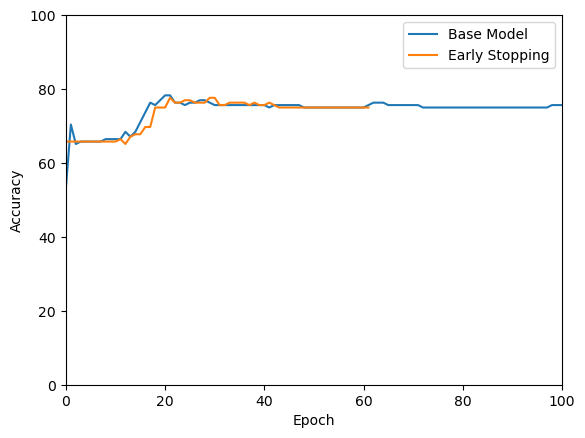

In [44]:
plt.plot(testing_accuracy, label='Base Model')
plt.plot(testing_accuracy_earlystop, label='Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

### BATCH NORMALISATION

In [45]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork().to(device)
print(" MODEL SUMMARY:")
print(model)

model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

 MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=512, out_features=2, bias=True)
  )
)


In [46]:
testing_accuracy_batch = []

def test_loop(test_dataloader, model, loss_fn):
    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss, test_correct = 0, 0
    
    with torch.no_grad():
        for df_scaled, y in test_dataloader:
            df_scaled = df_scaled.to(device=device, dtype=torch.float32)
            pred = model(df_scaled)
            test_loss += loss_fn(pred, y).item()
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    testing_loss.append(test_loss)
    test_correct /= size
    test_a = 100*test_correct
    testing_accuracy_batch.append(test_a)
    print(f"Test Error: \n Accuracy: {test_a:>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss


epochloop(100)

Epoch 1
-------------------------------
loss: 0.744384  [  760/  608]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.551154 

Epoch 2
-------------------------------
loss: 0.499098  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.509585 

Epoch 3
-------------------------------
loss: 0.427934  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.500089 

Epoch 4
-------------------------------
loss: 0.411271  [  760/  608]
Test Error: 
 Accuracy: 73.0%, Avg loss: 0.503153 

Epoch 5
-------------------------------
loss: 0.396325  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.506783 

Epoch 6
-------------------------------
loss: 0.374355  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.506623 

Epoch 7
-------------------------------
loss: 0.353987  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.507443 

Epoch 8
-------------------------------
loss: 0.339371  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.511271 

Epoch 9
----------------

Test Error: 
 Accuracy: 71.7%, Avg loss: 0.803998 

Epoch 72
-------------------------------
loss: 0.023750  [  760/  608]
Test Error: 
 Accuracy: 71.7%, Avg loss: 0.806111 

Epoch 73
-------------------------------
loss: 0.022783  [  760/  608]
Test Error: 
 Accuracy: 71.1%, Avg loss: 0.809197 

Epoch 74
-------------------------------
loss: 0.022007  [  760/  608]
Test Error: 
 Accuracy: 71.7%, Avg loss: 0.814160 

Epoch 75
-------------------------------
loss: 0.021450  [  760/  608]
Test Error: 
 Accuracy: 71.1%, Avg loss: 0.815678 

Epoch 76
-------------------------------
loss: 0.020634  [  760/  608]
Test Error: 
 Accuracy: 71.1%, Avg loss: 0.818615 

Epoch 77
-------------------------------
loss: 0.020042  [  760/  608]
Test Error: 
 Accuracy: 71.1%, Avg loss: 0.822884 

Epoch 78
-------------------------------
loss: 0.019423  [  760/  608]
Test Error: 
 Accuracy: 71.1%, Avg loss: 0.825541 

Epoch 79
-------------------------------
loss: 0.018867  [  760/  608]
Test Error: 
 Ac

### BASE MODEL vs BATCH NORMALIZATION

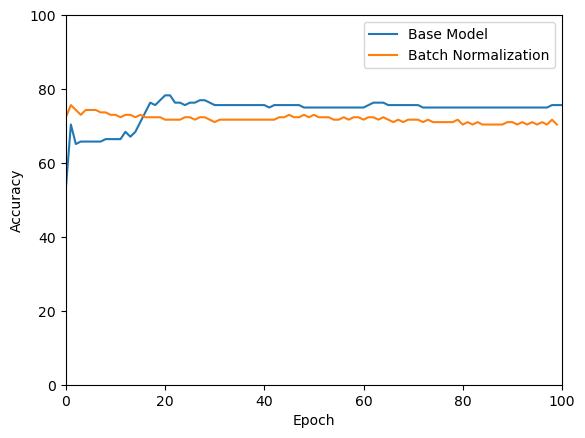

In [47]:
plt.plot(testing_accuracy, label='Base Model')
plt.plot(testing_accuracy_batch, label='Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

### WEIGHT DECAY

In [48]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork().to(device)
print(" MODEL SUMMARY:")
print(model)

model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay = 0.001)

 MODEL SUMMARY:
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=2, bias=True)
  )
)


In [49]:
testing_accuracy_weight = []

def test_loop(test_dataloader, model, loss_fn):
    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss, test_correct = 0, 0
    
    with torch.no_grad():
        for df_scaled, y in test_dataloader:
            df_scaled = df_scaled.to(device=device, dtype=torch.float32)
            pred = model(df_scaled)
            test_loss += loss_fn(pred, y).item()
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    testing_loss.append(test_loss)
    test_correct /= size
    test_a = 100*test_correct
    testing_accuracy_weight.append(test_a)
    print(f"Test Error: \n Accuracy: {test_a:>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss

epochloop(100)

Epoch 1
-------------------------------
loss: 0.689253  [  760/  608]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.681471 

Epoch 2
-------------------------------
loss: 0.680541  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.666247 

Epoch 3
-------------------------------
loss: 0.666583  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.651587 

Epoch 4
-------------------------------
loss: 0.652960  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.638878 

Epoch 5
-------------------------------
loss: 0.640955  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.627942 

Epoch 6
-------------------------------
loss: 0.630405  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.618279 

Epoch 7
-------------------------------
loss: 0.620900  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.609440 

Epoch 8
-------------------------------
loss: 0.612063  [  760/  608]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.601121 

Epoch 9
----------------

Test Error: 
 Accuracy: 73.7%, Avg loss: 0.472568 

Epoch 71
-------------------------------
loss: 0.465362  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.472650 

Epoch 72
-------------------------------
loss: 0.464829  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.472730 

Epoch 73
-------------------------------
loss: 0.464293  [  760/  608]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.472803 

Epoch 74
-------------------------------
loss: 0.463748  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.472887 

Epoch 75
-------------------------------
loss: 0.463213  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.472967 

Epoch 76
-------------------------------
loss: 0.462674  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.473037 

Epoch 77
-------------------------------
loss: 0.462129  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.473111 

Epoch 78
-------------------------------
loss: 0.461601  [  760/  608]
Test Error: 
 Ac

### BASE MODEL vs WEIGHT DECAY

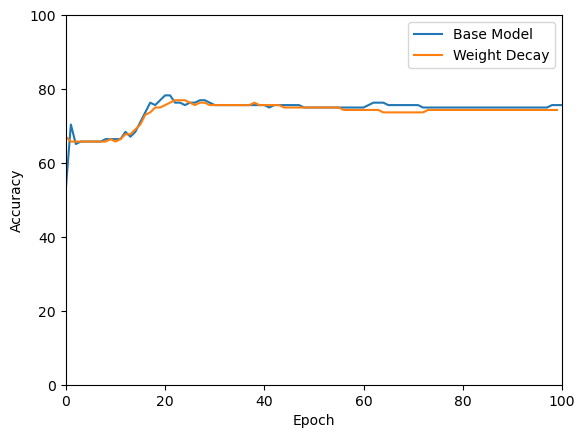

In [50]:
plt.plot(testing_accuracy, label='Base Model')
plt.plot(testing_accuracy_weight, label='Weight Decay')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

### LEARNING RATE SCHEDULER

In [51]:
# ACCURACY IMPROVED SLIGHTLY
#CHECKING THE ACCURACY BY VARYING THE STEP SIZE - 10 GAVE THE HIGHEST ACCURACY
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)

In [52]:
testing_accuracy_learning = []
def test_loop(test_dataloader, model, loss_fn):
    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss, test_correct = 0, 0
    
    with torch.no_grad():
        for df_scaled, y in test_dataloader:
            df_scaled = df_scaled.to(device=device, dtype=torch.float32)
            pred = model(df_scaled)
            test_loss += loss_fn(pred, y).item()
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    testing_loss.append(test_loss)
    test_correct /= size
    test_a = 100*test_correct
    testing_accuracy_learning.append(test_a)
    print(f"Test Error: \n Accuracy: {test_a:>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss

In [53]:
def epochloop(epochs):
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loop(train_dataloader, model, loss_fn, optimizer)
        test_loop(test_dataloader, model, loss_fn)
        scheduler.step()
    print("Done!")
    
epochloop(100)

Epoch 1
-------------------------------
loss: 0.449748  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.474028 

Epoch 2
-------------------------------
loss: 0.448851  [  760/  608]
Test Error: 
 Accuracy: 75.0%, Avg loss: 0.474410 

Epoch 3
-------------------------------
loss: 0.448547  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.474997 

Epoch 4
-------------------------------
loss: 0.448316  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.475300 

Epoch 5
-------------------------------
loss: 0.447925  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.475404 

Epoch 6
-------------------------------
loss: 0.447416  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.475472 

Epoch 7
-------------------------------
loss: 0.446894  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.475578 

Epoch 8
-------------------------------
loss: 0.446399  [  760/  608]
Test Error: 
 Accuracy: 74.3%, Avg loss: 0.475707 

Epoch 9
----------------

Test Error: 
 Accuracy: 75.7%, Avg loss: 0.478355 

Epoch 70
-------------------------------
loss: 0.435258  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.478372 

Epoch 71
-------------------------------
loss: 0.435205  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.478382 

Epoch 72
-------------------------------
loss: 0.435166  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.478391 

Epoch 73
-------------------------------
loss: 0.435127  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.478401 

Epoch 74
-------------------------------
loss: 0.435088  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.478411 

Epoch 75
-------------------------------
loss: 0.435049  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.478422 

Epoch 76
-------------------------------
loss: 0.435011  [  760/  608]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.478433 

Epoch 77
-------------------------------
loss: 0.434974  [  760/  608]
Test Error: 
 Ac

In [54]:
torch.save(model.state_dict(), 'ssoma_sriinith_assignment2_part2.pth')

### BASE MODEL vs LEARNING RATE SCHEDULER

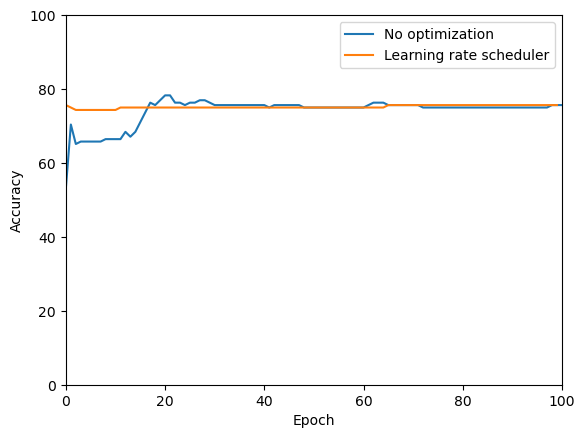

In [55]:
plt.plot(testing_accuracy, label='No optimization')
plt.plot(testing_accuracy_learning, label='Learning rate scheduler')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

### REFERENCES

1) https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

2) https://pytorch.org/tutorials/beginner/saving_loading_models.html

3) https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

4) https://pytorch.org/docs/stable/nn.html#loss-functions

5) https://pytorch.org/docs/stable/optim.html

6) torch.nn.init — PyTorch 2.0 documentation

7) StepLR — PyTorch 2.0 documentation